<a href="https://colab.research.google.com/github/levanduy99/Recognising-Traffic-Signs-With-CNN/blob/main/TrainRoadSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
#thư viện kết nối với google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TrainRoadSignals

/content/drive/MyDrive/TrainRoadSignals


In [ ]:
ls

limit_speed20.jpg  train.p              TrainRoadSignals.ipynb
test.p             trainRoadSignals.h5  valid.p


## Tải dữ liệu 

In [ ]:
import pickle
train_link = "./train.p"
valid_link = "./valid.p"
test_link = "./test.p"
#The `r` stands for read mode and the `b` stands for binary mode
with open(train_link, mode = "rb") as f:
  train = pickle.load(f)
with open(valid_link, mode = "rb") as f:
  valid = pickle.load(f)
with open(test_link, mode = "rb") as f:
  test = pickle.load(f)

In [ ]:
#Trong dữ liệu có tập train và tập nhãn
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

## Tóm tắt tập dữ liệu
* `features` là một mảng 4 chiều chứa dữ liệu pixel thô của hình ảnh biển báo giao thông. **(num examples, width, height, channels)**
* `labels` là một mảng 1 chiều chứa id nhãn của biển báo giao thông.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Số lượng ảnh cho training 
n_train = trainX.shape[0]

# TODO: Số lượng ảnh cho validation
n_validation = validX.shape[0]

# TODO: Số lượng ảnh để test.
n_test = testX.shape[0]

# TODO: Shape của một hình ảnh biển báo giao thông.
image_shape = trainX.shape[1:]

# TODO: Xem bao nhiêu lớp/nhãn duy nhất trong tập dữ liệu.
n_classes = len(np.unique(trainY))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


Phân bố dữ liệu (trên tập Train)

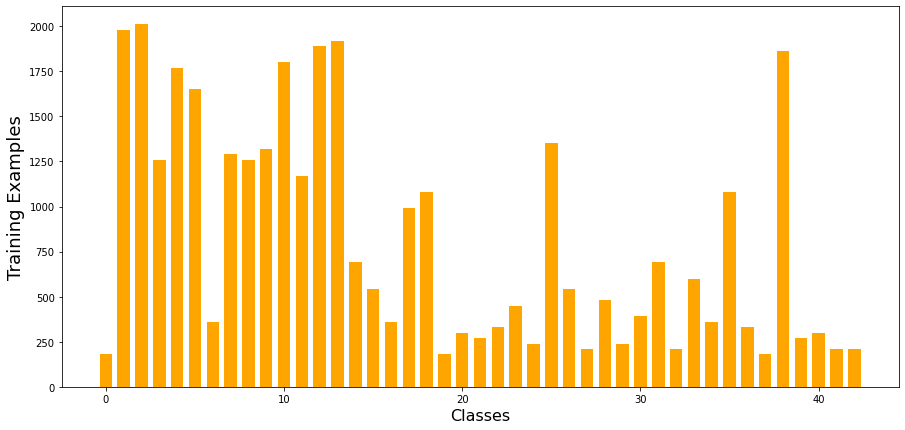

In [ ]:
import matplotlib.pyplot as plt
number_of_image_per_class = np.unique(trainY, return_counts=True)
x = np.arange(43)
y = number_of_image_per_class[1]
xlabel = 'Classes'
ylabel = 'Training Examples'
# plot distribution chart
plt.figure(figsize=(15,7))
plt.ylabel(ylabel, fontsize=18)
plt.xlabel(xlabel, fontsize=16)
plt.bar(x, y, 0.7, color='orange')
plt.show()

In [ ]:
#Thông số ảnh các lớp trên tập Train.
print(y)

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


In [ ]:
classNames = {
 0: 'Tốc độ tối đa cho phép (20km/h)',
 1: 'Tốc độ tối đa cho phép (30km/h)',
 2: 'Tốc độ tối đa cho phép (50km/h)',
 3: 'Tốc độ tối đa cho phép (60km/h)',
 4: 'Tốc độ tối đa cho phép (70km/h)',
 5: 'Tốc độ tối đa cho phép (80km/h)',
 6: 'Hạn chế tốc độ tối đa (80km/h)',
 7: 'Tốc độ tối đa cho phép (100km/h)',
 8: 'Tốc độ tối đa cho phép (120km/h)',
 9: 'Cấm vượt',
 10: 'Cấm ôtô tải vượt',
 11: 'Giao nhau với đường không ưu tiên',
 12: 'Bắt đầu đường ưu tiên',
 13: 'Nhường đường',
 14: 'Dừng lại',
 15: 'Đường cấm',
 16: 'Cấm xe ôtô tải',
 17: 'Cấm đi ngược chiều',
 18: 'Nguy hiểm khác',
 19: 'Chỗ ngoặt nguy hiểm vòng bên trái',
 20: 'Chỗ ngoặt nguy hiểm vòng bên phải',
 21: 'Nhiều chỗ ngoặt nguy hiểm liên tiếp',
 22: 'Đường có ổ gà, lồi lõm',
 23: 'Đường trơn',
 24: 'Đường bị thu hẹp về phía phải',
 25: 'Công trường',
 26: ' Giao nhau có tín hiệu đèn',
 27: 'Đường người đi bộ cắt ngang',
 28: 'Trẻ em',
 29: 'Đường người đi xe đạp cắt ngang',
 30: 'Cẩn thận với băng / tuyết',
 31: 'Động vật hoang dã băng qua',
 32: 'Hết tất cả các lệnh cấm',
 33: 'Các xe chỉ được rẽ phải',
 34: 'Các xe chỉ được rẽ trái',
 35: 'Các xe chỉ được đi thẳng',
 36: 'Đi thẳng hoặc sang phải',
 37: 'Đi thẳng hoặc sang trái',
 38: 'Hướng phải đi vòng chướng ngại vật',
 39: 'Hướng trái đi vòng chướng ngại vật',
 40: 'Đi vòng bắt buộc',
 41: 'Hết cấm vượt',
 42: 'Cấm các phương tiện trên 3,5 tấn đi qua'
}

Xáo trộn dữ liệu

In [ ]:
#Tráo ảnh
#Các ảnh này giống nhau đặt gần nhau -- nó ảnh hưởng [Khi chúng ta train model 
#Theo từng phần 1 thì mà mỗi một phần lại có các ảnh giống hệt nhau thì nó ảnh hưởng đến tính tổng quát của phần đó model đó]
from sklearn.utils import shuffle
#Tráo ảnh tráo nhãn đi kèm
trainX, trainY = shuffle(trainX, trainY)

In [ ]:
#  Tất cả các data point xuống 0<point<1. Mỗi pixal từ [0-255] 
# --- Lý do: giúp cho sự ảnh hưởng giữa các data point lên cái việc trainning nó tương đồng nhau nhiều hơn => để tránh bị thiên vị 
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

One hot encoding label

In [ ]:

from sklearn.preprocessing import LabelBinarizer

In [ ]:
trainY[0]

28

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY) 

In [ ]:
trainY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Xây dựng mạng

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
#Định nghĩa đầu vào
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [ ]:
# Định nghĩa model, khoi tao model bang API sequential
model = Sequential()
#Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng padding = same để kích thước giống như là kích thước ảnh đầu vào 
#(*nhưng bản chất kích thước thật đã bị thu nhỏ lại phần còn lại chuyển thành 0 hết)
#mặc định sẽ là stride=1 và padding để cho output cùng width và height với input
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
#them lop activation
model.add(Activation("relu"))
#Thêm lớp BatchNormalization dùng để chuẩn hóa phân bố theo dạng sao cho phân 
#bố của data đồng nhất với input ban đầu
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
#Thêm Fully Connected layer với 512 nodes 
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
#Output layer với 43 node và dùng hàm softmax function để chuyển sang xác xuất
model.add(Dense(classes))
model.add(Activation("softmax"))

In [ ]:
#Kiem tra hien tai kien truc cua model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

Vẽ kiến trúc mạng thông qua thư viện visualkeras

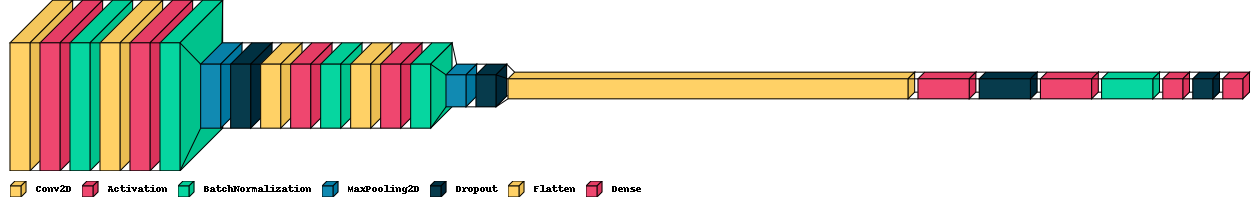

In [ ]:
import visualkeras
font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font) 


In [ ]:
#Thực hiện tăng cường data
aug = ImageDataGenerator(rotation_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
#Tốc độ học
learning_rate = 0.01

In [ ]:
#Thực hiện chạy tổng thể 20 lần
epochs = 20 
#Trong mỗi epochs chạy nhiều step
#Trong mỗi step cần chạy 1 phần của data
batch_size = 16

In [ ]:
#Khai báo thuật toán để tối ưu hàm loss function
#Stochastic Gradient Descent
#Momentum: tăng tốc độ dốc xuống theo hướng có liên quan và làm giảm dao động (Defaults to 0)
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
#Chạy model, chỉ rõ hàm loss_function nào được sử dụng.
#Phương thức dùng để tối ưu hàm loss function.
#categorical_crossentropy là Sử dụng crossentropy loss function khi có hai hoặc nhiều lớp label
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Thực hiện training model với data
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Epoch 1/20
2174/2174 [==============================] - 108s 50ms/step - loss: 2.4511 - accuracy: 0.3357 - val_loss: 1.5071 - val_accuracy: 0.5317
Epoch 2/20
2174/2174 [==============================] - 107s 49ms/step - loss: 0.9737 - accuracy: 0.6828 - val_loss: 0.8606 - val_accuracy: 0.7358
Epoch 3/20
2174/2174 [==============================] - 107s 49ms/step - loss: 0.5084 - accuracy: 0.8316 - val_loss: 0.6861 - val_accuracy: 0.7923
Epoch 4/20
2174/2174 [==============================] - 104s 48ms/step - loss: 0.3695 - accuracy: 0.8784 - val_loss: 0.5207 - val_accuracy: 0.8379
Epoch 5/20
2174/2174 [==============================] - 107s 49ms/step - loss: 0.2756 - accuracy: 0.9083 - val_loss: 0.4000 - val_accuracy: 0.8778
Epoch 6/20
2174/2174 [==============================] - 107s 49ms/step - loss: 0.2199 - accuracy: 0.9265 - val_loss: 0.3460 - val_accuracy: 0.8893
Epoch 7/20
2174/2174 [==============================] - 107s 49ms/step - loss: 0.1916 - accuracy: 0.9369 - val_loss: 0

Lưu model

In [ ]:
model.save("trainRoadSignals.h5")

Kết Quả

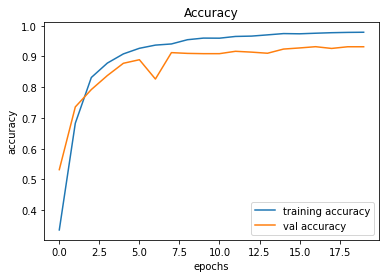

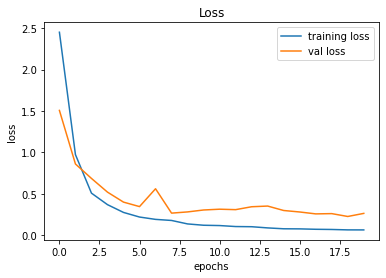

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(H.history['accuracy'], label='training accuracy')
plt.plot(H.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(H.history['loss'], label='training loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# load model
saved_model = tf.keras.models.load_model("trainRoadSignals.h5")

Calculating accuracy with testing dataset

In [ ]:
#Thực hiện test trên 20 ảnh ngẫu nhiên ảnh trong tập testX.
import random
for i in range(20):
  index = random.randrange(1, 10000, 100)
  preds = saved_model.predict(testX[index:index+1])
  print('image TestX[{0:d}] testing accuracy = {1:.5f}'.format(index, preds[0][np.argmax(preds)]))

image TestX[5501] testing accuracy = 1.00000
image TestX[4401] testing accuracy = 1.00000
image TestX[6501] testing accuracy = 1.00000
image TestX[5601] testing accuracy = 1.00000
image TestX[6001] testing accuracy = 1.00000
image TestX[2501] testing accuracy = 1.00000
image TestX[9801] testing accuracy = 1.00000
image TestX[2201] testing accuracy = 1.00000
image TestX[8401] testing accuracy = 1.00000
image TestX[6901] testing accuracy = 1.00000
image TestX[201] testing accuracy = 1.00000
image TestX[3201] testing accuracy = 1.00000
image TestX[9801] testing accuracy = 1.00000
image TestX[2301] testing accuracy = 1.00000
image TestX[6301] testing accuracy = 0.67959
image TestX[6301] testing accuracy = 0.67959
image TestX[9901] testing accuracy = 0.73471
image TestX[7901] testing accuracy = 1.00000
image TestX[4901] testing accuracy = 1.00000
image TestX[801] testing accuracy = 1.00000


Độ chính xác (accuracy) với tập dữ liệu testX

In [ ]:
pred = saved_model.predict_classes(testX)
from sklearn.metrics import accuracy_score
print('Test Data accuracy: ',accuracy_score(testY,pred)*100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Data accuracy:  89.9920823436263


Confusion matrix

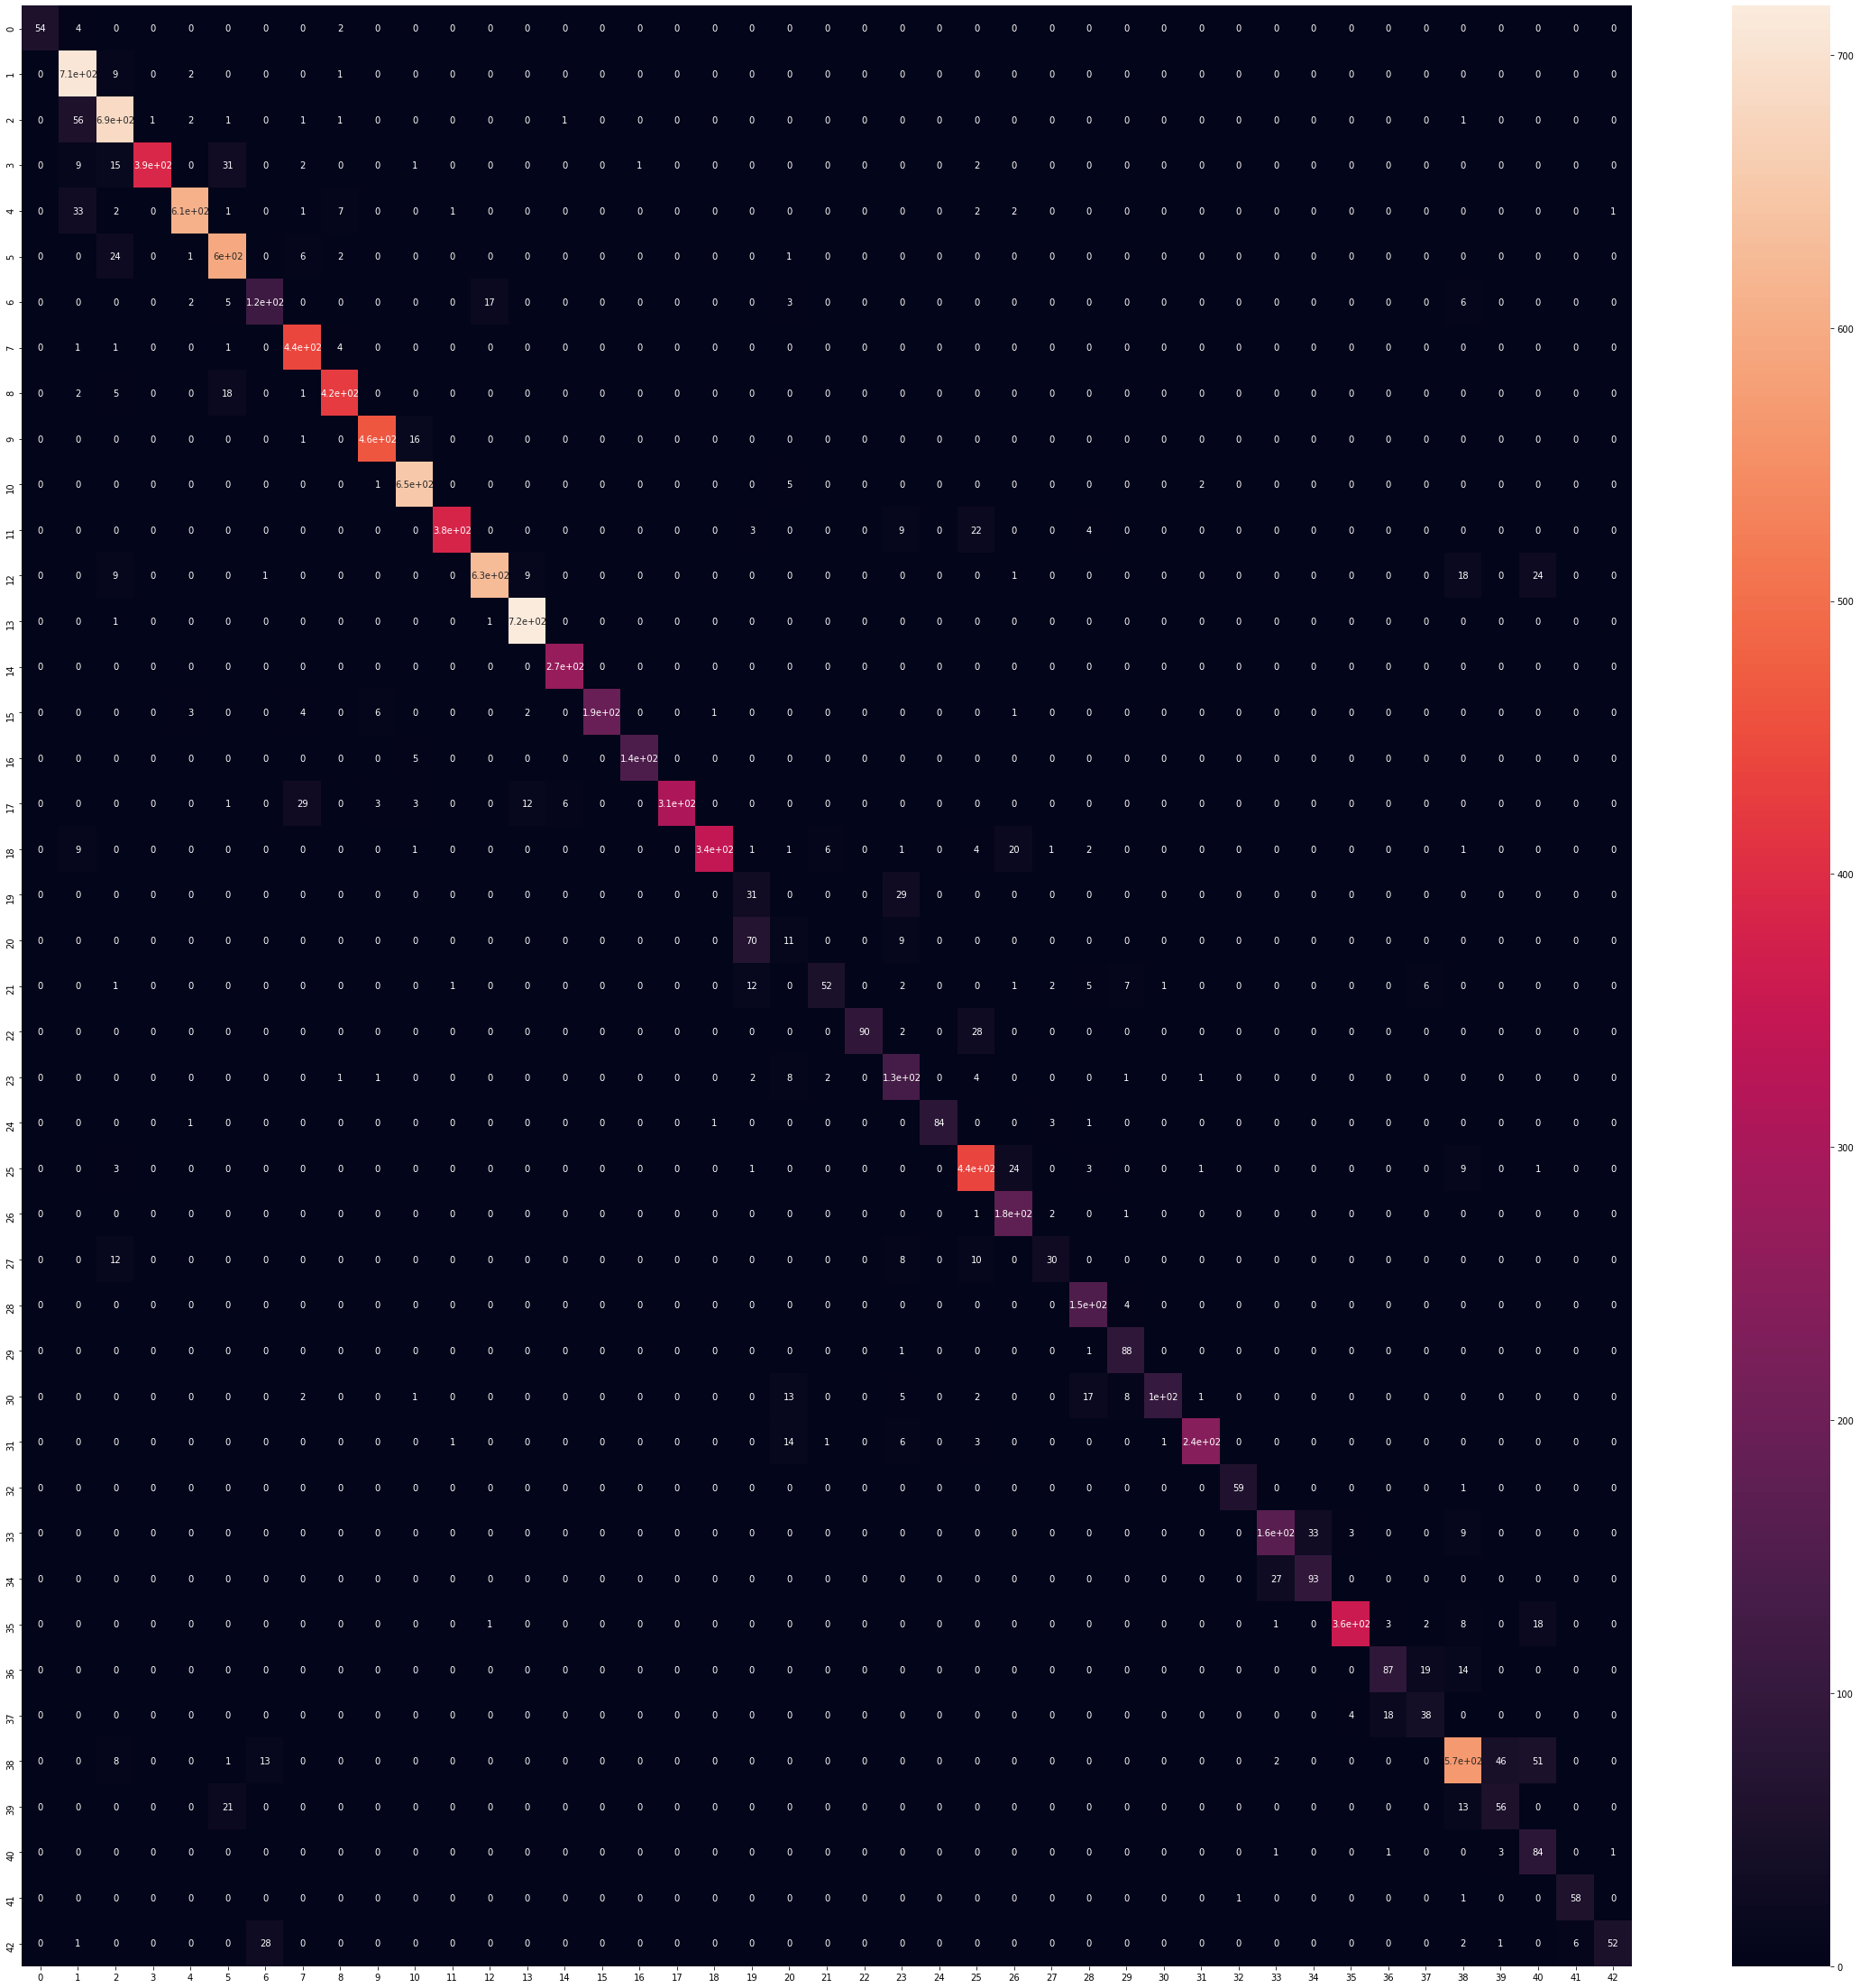

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY, pred)
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(cf, index = classNames,  columns = classNames)
plt.figure(figsize = (40, 40))
#Heatmap là biểu đồ sử dụng cường độ màu sắc để thể hiện độ lớn của giá trị.
sns.heatmap(df_cm, annot=True)

## Ma trận confusion
- Confusion matrix giúp có cái nhìn rõ hơn về việc các điểm dữ liệu được phân loại đúng/sai như thế nào.

### Phân tích:
- Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive. (bao nhiêu cái đúng được lấy ra)
- Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive. (bao nhiêu cái được lấy ra là đúng)
- Accuracy là tỉ lệ giữa số điểm được phân loại đúng và tổng số điểm. 
- Macro-average precision là trung bình cộng của các precision theo class, tương tự với Macro-average recall.
- Micro-average F-Score cũng được tính tương tự như F-score nhưng dựa trên micro-average precision và micro-average recall.





In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.86      0.98      0.92       720
           2       0.88      0.91      0.90       750
           3       1.00      0.86      0.93       450
           4       0.98      0.92      0.95       660
           5       0.88      0.95      0.91       630
           6       0.74      0.78      0.76       150
           7       0.90      0.98      0.94       450
           8       0.96      0.94      0.95       450
           9       0.98      0.96      0.97       480
          10       0.96      0.99      0.97       660
          11       0.99      0.91      0.95       420
          12       0.97      0.91      0.94       690
          13       0.97      1.00      0.98       720
          14       0.97      1.00      0.99       270
          15       1.00      0.92      0.96       210
          16       0.99      0.97      0.98       150
          17       1.00    

Time for classification

In [ ]:
from timeit import default_timer as timer
for i in range(20):
  start = timer()
  preds = saved_model.predict(testX[i:i+1])
  end = timer()
  print('image TestX[{0:d}] classification time = {1:.5f}'.format(i, end - start))

image TestX[0] classification time = 0.03820
image TestX[1] classification time = 0.03694
image TestX[2] classification time = 0.03054
image TestX[3] classification time = 0.03012
image TestX[4] classification time = 0.02967
image TestX[5] classification time = 0.03029
image TestX[6] classification time = 0.03113
image TestX[7] classification time = 0.03273
image TestX[8] classification time = 0.04846
image TestX[9] classification time = 0.03524
image TestX[10] classification time = 0.03261
image TestX[11] classification time = 0.03046
image TestX[12] classification time = 0.05153
image TestX[13] classification time = 0.03772
image TestX[14] classification time = 0.03794
image TestX[15] classification time = 0.03006
image TestX[16] classification time = 0.04801
image TestX[17] classification time = 0.03524
image TestX[18] classification time = 0.05098
image TestX[19] classification time = 0.03098


In [ ]:
sum_time = 0
for i in range(1000):
  start = timer()
  preds = saved_model.predict(testX[i:i+1])
  end = timer()
  sum_time += (end - start)
average_time = sum_time/1000
print('average prediction time for each image = {0:.5f}'.format(average_time))

average prediction time for each image = 0.03371


In [ ]:
#Load image to test
image_link = "./limit_speed20.jpg"

import tensorflow as tf
from keras_preprocessing import image
import numpy as np
images = image.load_img(image_link, target_size=(32, 32, 3))    
x = image.img_to_array(images)
x = x/255.0
print(x.shape) #(32, 32, 3)
y = np.expand_dims(x, axis=(0))
print(y.shape) #(1, 32, 32, 3)
